# Title

# Goals:

- 

- 

- 

## Imports

In [1]:
#tabular data imports :
import pandas as pd
import numpy as np
import env
from env import username, password, host
from pydataset import data

# visualization imports:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
#stats
import scipy.stats as stats
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings("ignore")
import explore as e
import wrangle as w

## Acquire

- Data was gathered during the Tobias cohort from the url: 'https://www.kaggle.com/datasets/vinayakshanawad/cement-manufacturing-concrete-dataset'.

- Original size of data (1030 rows, 9 columns)

- Each row represents a concrete sample

- Each column represents a feature for each concrete sample

In [2]:
# turning the .csv into a pandas df and taking a peek
concrete = pd.read_csv('concrete.csv')
concrete.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22


In [3]:
concrete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


## **Prepare**

* List steps taken to clean your data here
* In particular call out how you handle null values and outliers in detail
* You must do this even if you do not do anything or do not encounter any
* Any time there is potential to make changes to the data you must be upfront about the changes you make or do not make

In [4]:
df = w.prepared_concrete_data(concrete)
df.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
0,311.512806,467.379440,0.000000,448.640170,0.000000,2142.449716,1650.158070,28,4335.18582,5020.0
1,372.360318,93.034964,274.034266,348.991346,23.809896,2382.753296,1755.318444,14,3409.84338,5250.0
2,551.155000,0.000000,210.982134,413.145788,12.125410,2109.600878,1898.618744,28,4238.01036,5196.0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,619.868297,230.396821,224.871240,424.113772,601.640798,771.617000,1190.494800
slag,1030.0,162.912214,190.213162,0.000000,0.000000,48.501640,315.150429,792.340428
ash,1030.0,119.464719,141.089075,0.000000,0.000000,0.000000,260.806546,441.144462
water,1030.0,400.286860,47.077937,268.522716,363.541838,407.854700,423.287040,544.541140
superplastic,1030.0,13.678918,13.170050,0.000000,0.000000,14.109568,22.487124,70.988764
coarseagg,1030.0,2144.916536,171.417922,1765.900620,2054.705840,2134.072160,2269.435828,2524.289900
fineagg,1030.0,1705.451010,176.757569,1309.544280,1611.466989,1718.501290,1816.606880,2188.305812
age,1030.0,45.662136,63.169912,1.000000,7.000000,28.000000,56.000000,365.000000
strength,1030.0,5194.965451,2422.967403,337.938540,3438.850980,4995.833910,6691.328130,11980.138800
total_lbs_per_yd^3,1030.0,5166.579612,144.095702,4838.000000,5051.250000,5179.000000,5270.000000,5624.000000


In [6]:
# finding count, nulls, dtype, column comprehension
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   cement              1030 non-null   float64
 1   slag                1030 non-null   float64
 2   ash                 1030 non-null   float64
 3   water               1030 non-null   float64
 4   superplastic        1030 non-null   float64
 5   coarseagg           1030 non-null   float64
 6   fineagg             1030 non-null   float64
 7   age                 1030 non-null   int64  
 8   strength            1030 non-null   float64
 9   total_lbs_per_yd^3  1030 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 88.5 KB


In [7]:
# checking for possible categorical features
df.nunique() 

cement                278
slag                  185
ash                   156
water                 195
superplastic          111
coarseagg             284
fineagg               302
age                    14
strength              845
total_lbs_per_yd^3    255
dtype: int64

## **Explore**
### Univariate

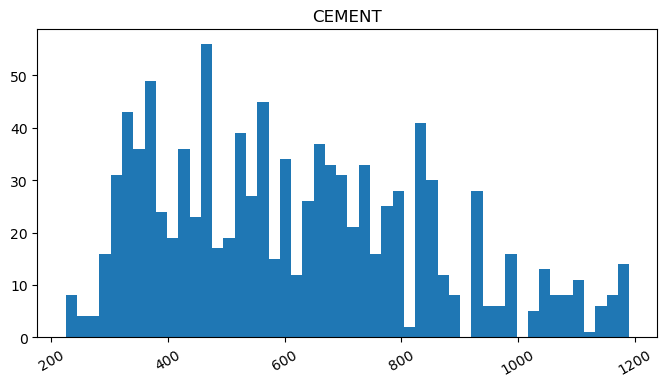

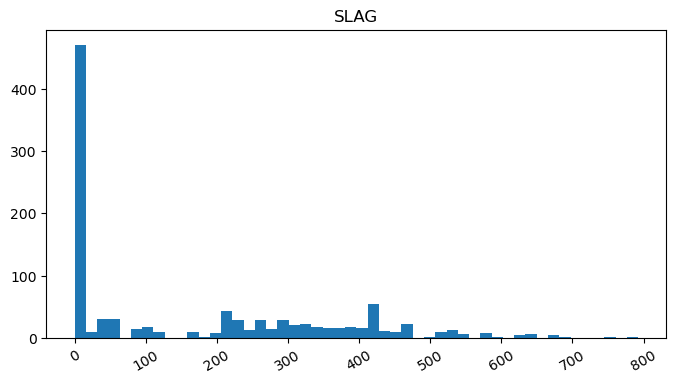

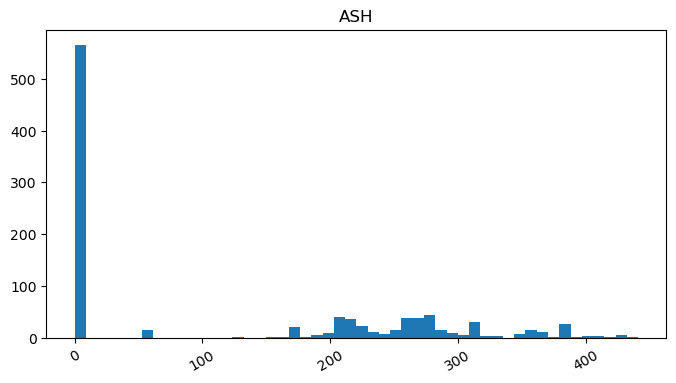

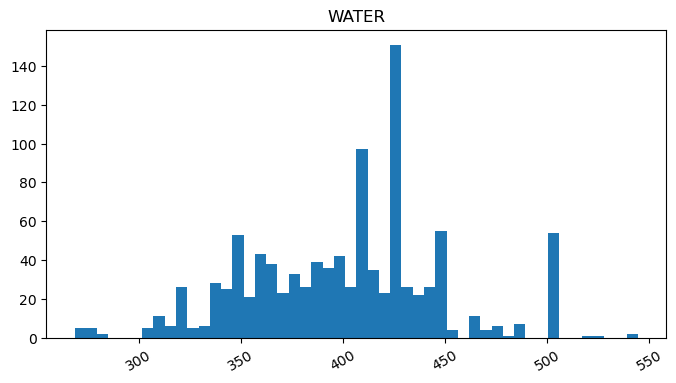

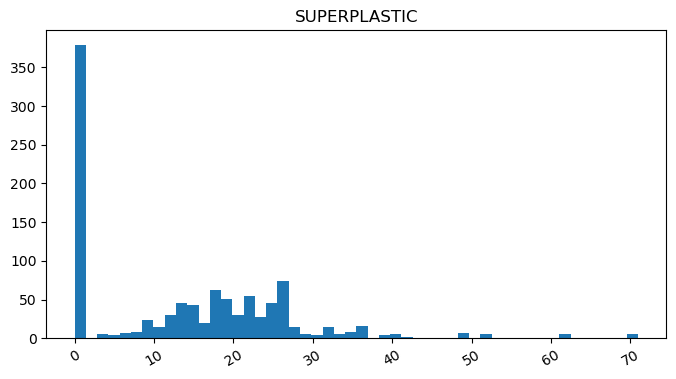

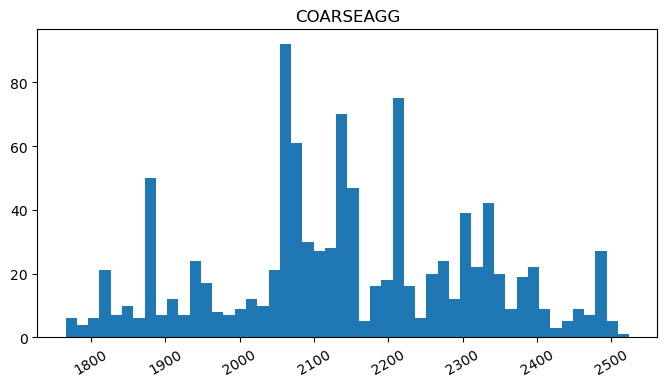

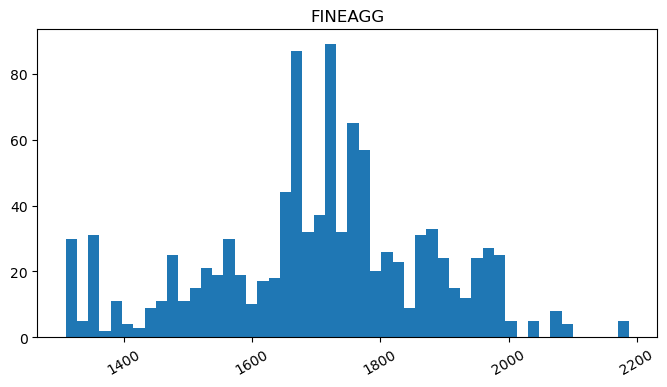

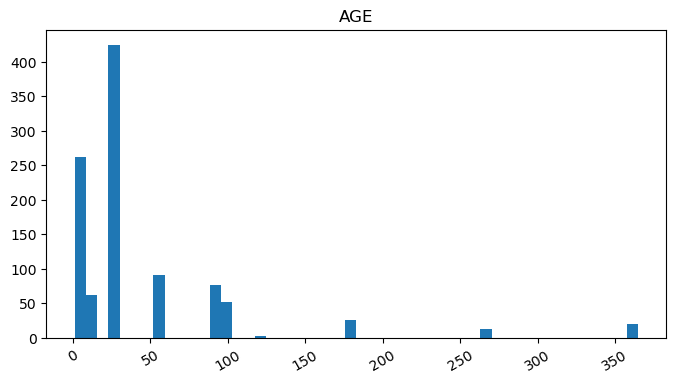

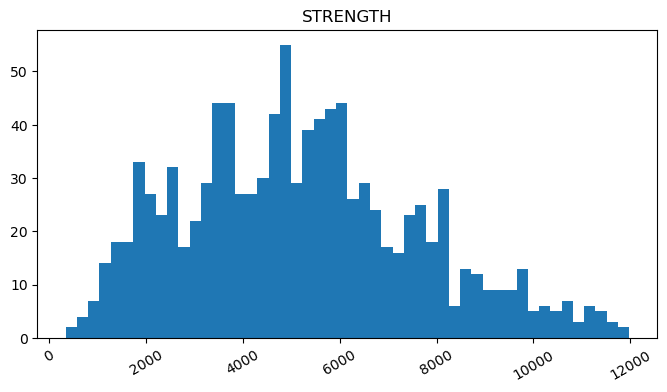

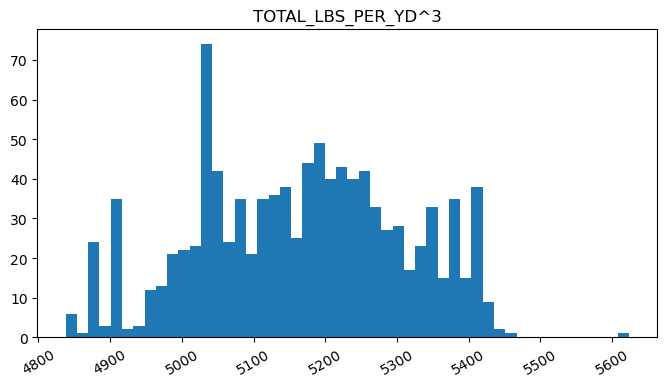

In [8]:
e.plot_all_histograms(df)

# **Split**

In [9]:
# split will print out the shape of each group
train, validate, test = e.split_data(df)


    train -> (618, 10)
    validate -> (206, 10)
    test -> (206, 10)


In [10]:
# taking a quick peek into train
train.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,total_lbs_per_yd^3
sample,,,,,,,,,,
600,610.67974,0.0000,0.00000,421.08242,0.000000,2134.07216,1887.15472,3,1647.63168,5053.0
160,729.72922,0.0000,0.00000,423.28704,0.000000,2156.11836,1818.81150,28,4561.44510,5128.0
854,853.18794,44.0924,207.23428,346.12534,25.573592,2067.93356,1862.90390,3,5042.97126,5407.0


## Checking `strength` for normality

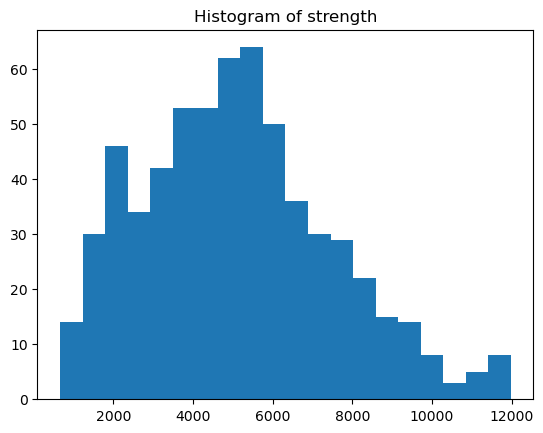

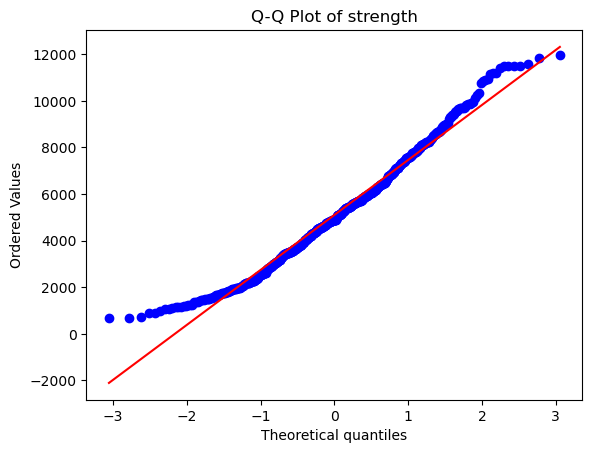

Shapiro-Wilk Test for strength: Statistic=0.978, p-value=0.000
D’Agostino’s K^2 Test for strength: Statistic=20.799, p-value=0.000
Anderson-Darling Test for strength: Statistic=2.376
15.000: 0.572, data does not look normal (reject H0)
10.000: 0.652, data does not look normal (reject H0)
5.000: 0.782, data does not look normal (reject H0)
2.500: 0.912, data does not look normal (reject H0)
1.000: 1.085, data does not look normal (reject H0)


In [11]:
e.check_normality(train, 'strength')

# **Explore**
### Scaling & Multi-variate

In [12]:
# splitting and scaling: printing out the shape of each group
train_scaled, validate_scaled, test_scaled = e.preprocess_concrete(df)
train_scaled.head(3)


    train -> (618, 10)
    validate -> (206, 10)
    test -> (206, 10)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,total_lbs_per_yd^3,strength
sample,,,,,,,,,,
600,0.399543,0.000000,0.000000,0.552716,0.000000,0.501050,0.657301,0.005495,0.3440,1647.63168
160,0.522831,0.000000,0.000000,0.560703,0.000000,0.531053,0.579528,0.074176,0.4640,4561.44510
854,0.650685,0.055648,0.469765,0.281150,0.360248,0.411041,0.629704,0.005495,0.9104,5042.97126


## Hypotheses:

### Q1. Is there a relationship between cement [content] and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between cement and strength

$H_a$ : There is a linear correlation between cement and strength

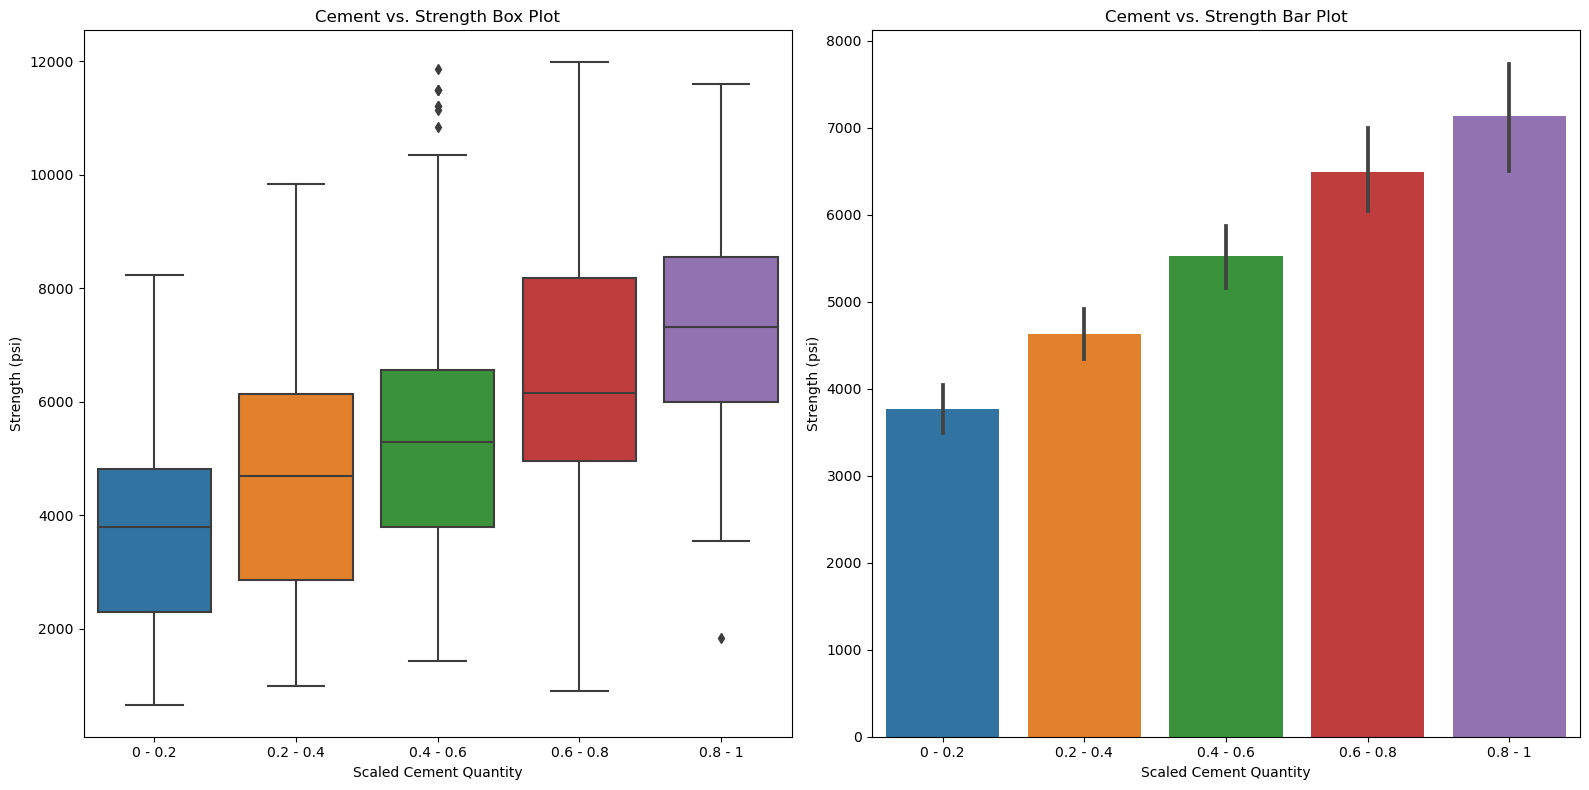

In [13]:
# Make a copy of the DataFrame for plotting to avoid changing the original
plot_df = train_scaled.copy()

# Create bins for the 'cement' feature
bins = pd.cut(plot_df['cement'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to the temporary DataFrame
plot_df['cement_bins'] = bins

# Set up a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='cement_bins', y='strength', data=plot_df)
plt.xlabel('Scaled Cement Quantity')
plt.ylabel('Strength (psi)')
plt.title('Cement vs. Strength Box Plot')

# Barplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(x='cement_bins', y='strength', data=plot_df)
plt.xlabel('Scaled Cement Quantity')
plt.ylabel('Strength (psi)')
plt.title('Cement vs. Strength Bar Plot')

# Display the plots
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

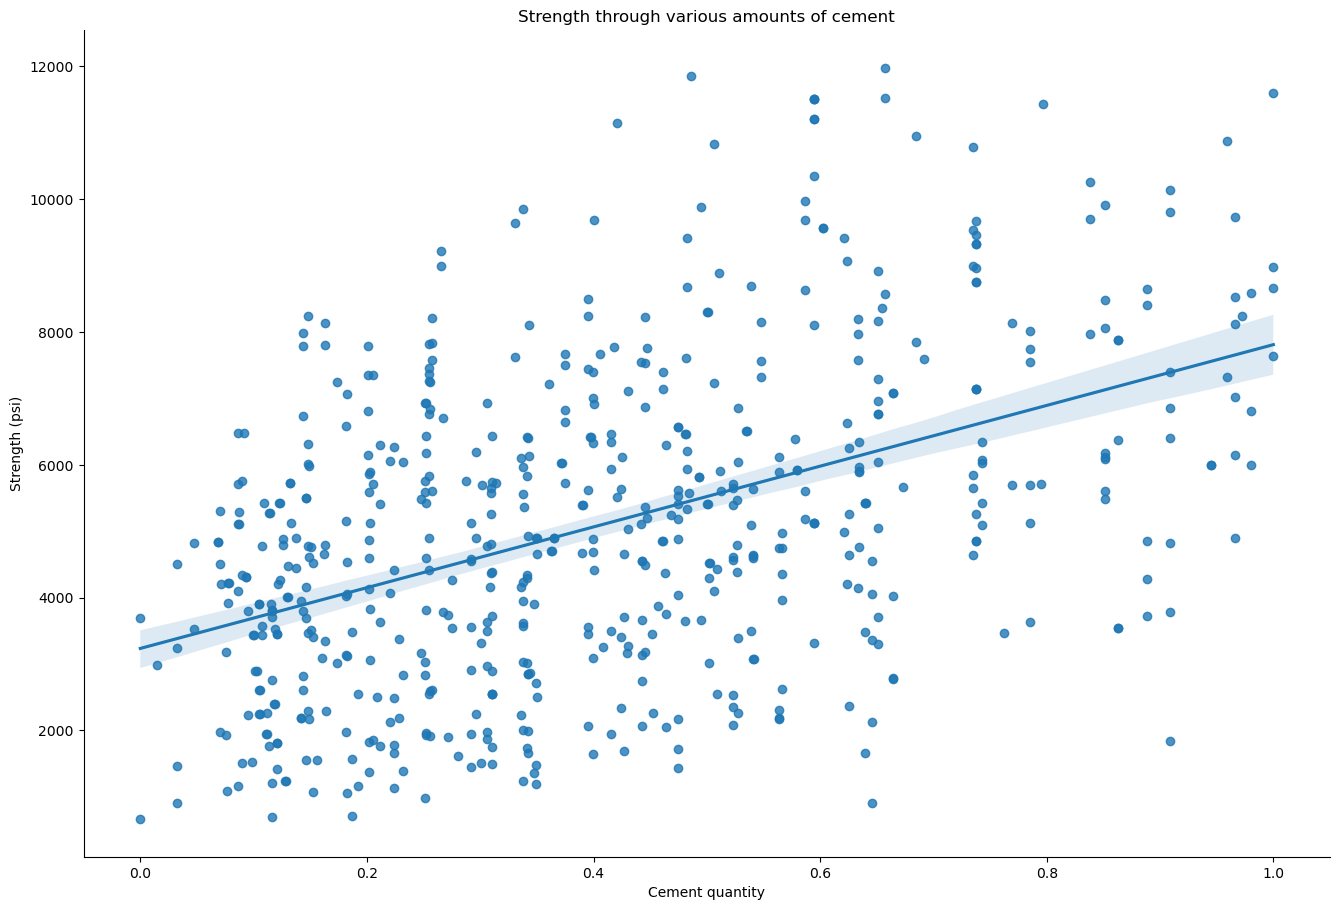

In [14]:
# plotting cement and strenght

sns.lmplot(data=train_scaled, x='cement', y='strength', markers='o', height = 9, aspect = 1.5)
plt.title('Strength through various amounts of cement')
plt.ylabel('Strength (psi)')
plt.xlabel('Cement quantity')
plt.show()

In [15]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['cement'], train_scaled['strength'])
print('Spearman correlation between cement and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between cement and strength: Correlation=0.448, p-value=0.000


In [16]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.447937
P-value: 7.878448102115859e-32


## We reject H₀, there is a monotonic relationship between cememt and strength

## Hypotheses:

### Q2. Is there a relationship between coarseagg and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between coarseagg and strength

$H_a$ : There is a linear correlation between coarseagg and strength

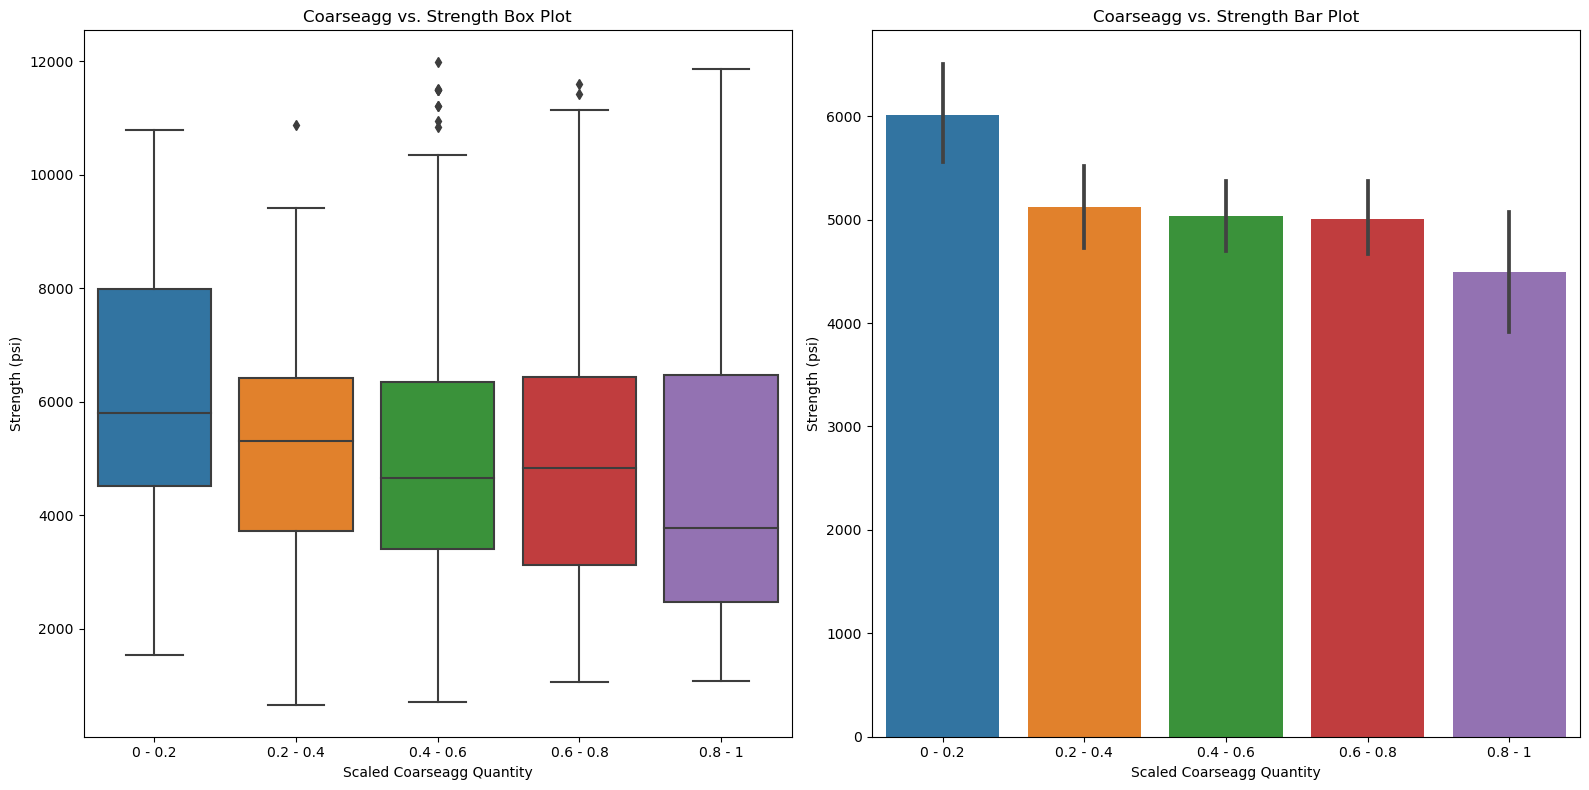

In [17]:
# Make a copy of the DataFrame for plotting to avoid changing the original
plot_df = train_scaled.copy()

# Create bins for the 'coarseagg' feature
bins = pd.cut(plot_df['coarseagg'], bins=5, labels=['0 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to the temporary DataFrame
plot_df['coarseagg_bins'] = bins

# Set up a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='coarseagg_bins', y='strength', data=plot_df)
plt.xlabel('Scaled Coarseagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Coarseagg vs. Strength Box Plot')

# Barplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(x='coarseagg_bins', y='strength', data=plot_df)
plt.xlabel('Scaled Coarseagg Quantity')
plt.ylabel('Strength (psi)')
plt.title('Coarseagg vs. Strength Bar Plot')

# Display the plots
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()


In [18]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['coarseagg'], train_scaled['strength'])
print('Spearman correlation between coarseagg and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between coarseagg and strength: Correlation=-0.161, p-value=0.000


In [19]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.160773
P-value: 5.949473233725961e-05


## We reject H₀, there is a monotonic relationship between coarseagg and strength

## Hypotheses:

### Q3. Is there a relationship between total_lbs_per_yd^3 and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between total_lbs_per_yd^3 and strength

$H_a$ : There is a linear correlation between total_lbs_per_yd^3 and strength

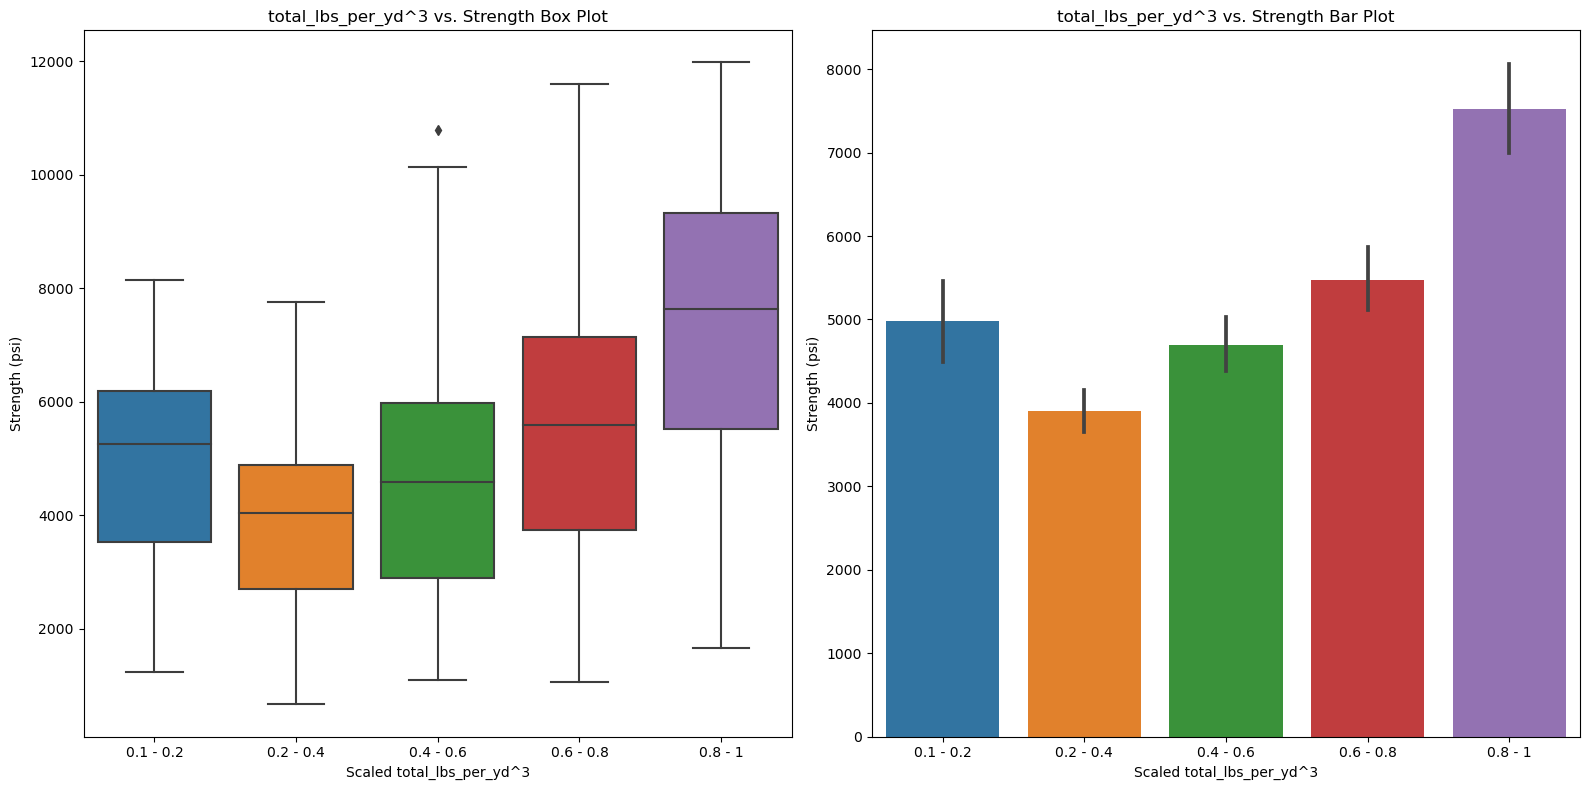

In [20]:
# Make a copy of the DataFrame for plotting to avoid changing the original
plot_df = train_scaled.copy()

# Create bins for the 'total_lbs_per_yd^3' feature
bins = pd.cut(plot_df['total_lbs_per_yd^3'], bins=5, labels=['0.1 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to the temporary DataFrame
plot_df['total_lbs_per_yd^3_bins'] = bins

# Set up a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='total_lbs_per_yd^3_bins', y='strength', data=plot_df)
plt.xlabel('Scaled total_lbs_per_yd^3')
plt.ylabel('Strength (psi)')
plt.title('total_lbs_per_yd^3 vs. Strength Box Plot')

# Barplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(x='total_lbs_per_yd^3_bins', y='strength', data=plot_df)
plt.xlabel('Scaled total_lbs_per_yd^3')
plt.ylabel('Strength (psi)')
plt.title('total_lbs_per_yd^3 vs. Strength Bar Plot')

# Display the plots
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()


In [21]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['total_lbs_per_yd^3'], train_scaled['strength'])
print('Spearman correlation between total_lbs_per_yd^3 and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between total_lbs_per_yd^3 and strength: Correlation=0.361, p-value=0.000


In [22]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: 0.360755
P-value: 1.971966600003703e-20


## We reject H₀, there is a monotonic relationship between total_lbs_per_yd^3 and strength

## Hypotheses:

### Q4. Is there a relationship between fineagg and strength?

- *both of my variables are **continuous***

- check for correlation

- alpha = 0.05

$H_0$ : There is no linear correlation between fineragg and strength

$H_a$ : There is a linear correlation between fineragg and strength

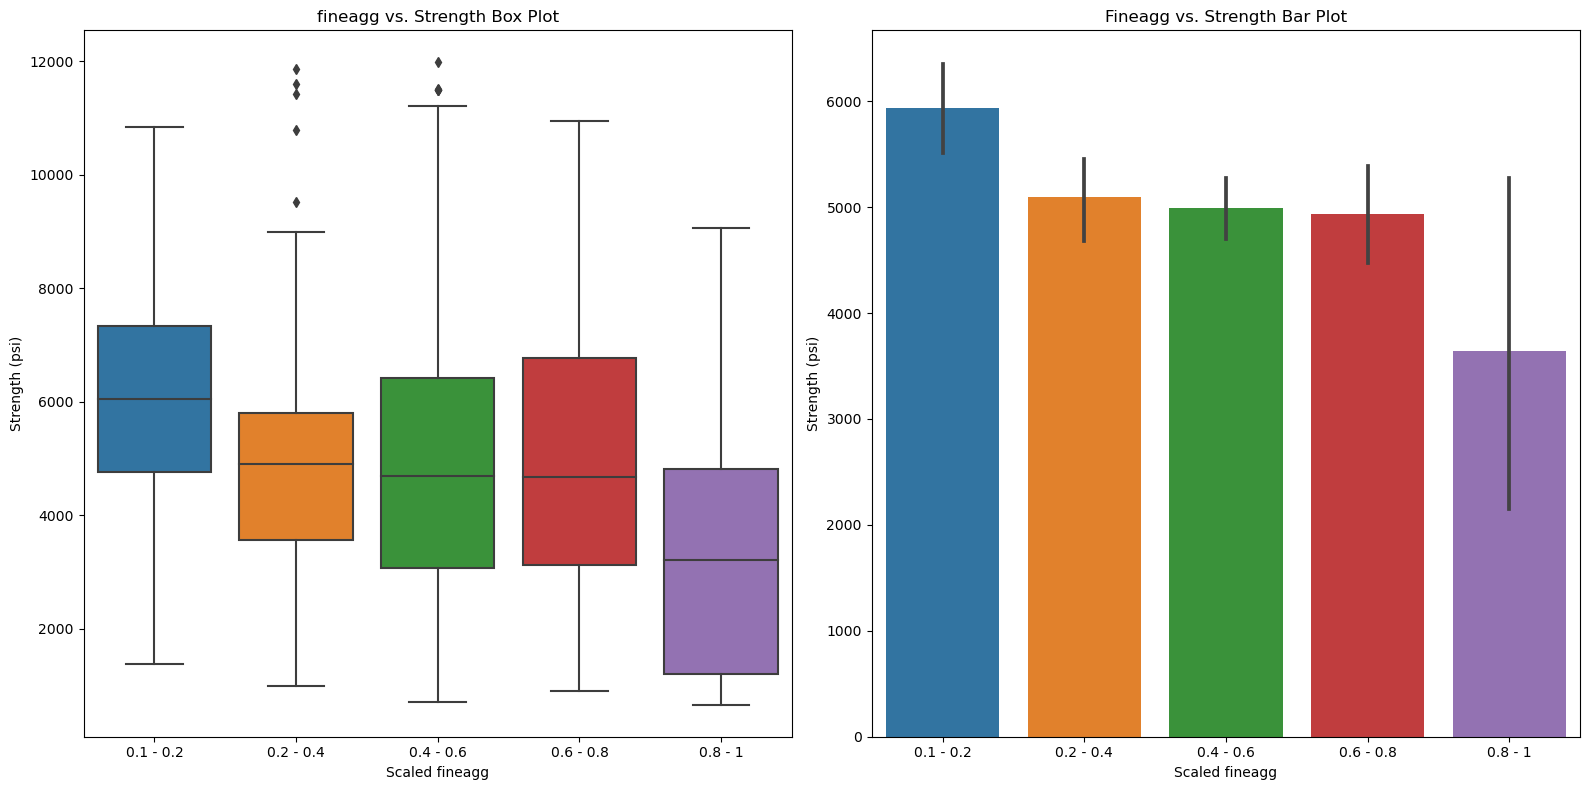

In [23]:
# Make a copy of the DataFrame for plotting to avoid changing the original
plot_df = train_scaled.copy()

# Create bins for the 'fineagg' feature
bins = pd.cut(plot_df['fineagg'], bins=5, labels=['0.1 - 0.2', '0.2 - 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1'])

# Add the binned feature to the temporary DataFrame
plot_df['fineagg_bins'] = bins

# Set up a figure with two subplots side by side
plt.figure(figsize=(16, 8))

# Boxplot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='fineagg_bins', y='strength', data=plot_df)
plt.xlabel('Scaled fineagg')
plt.ylabel('Strength (psi)')
plt.title('fineagg vs. Strength Box Plot')

# Barplot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.barplot(x='fineagg_bins', y='strength', data=plot_df)
plt.xlabel('Scaled fineagg')
plt.ylabel('Strength (psi)')
plt.title('Fineagg vs. Strength Bar Plot')

# Display the plots
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()


In [24]:
# Spearman's correlation between 'cement' and 'strength'
r, p = stats.spearmanr(train_scaled['fineagg'], train_scaled['strength'])
print('Spearman correlation between fineagg and strength: Correlation=%.3f, p-value=%.3f' % (r, p))

Spearman correlation between fineagg and strength: Correlation=-0.162, p-value=0.000


In [25]:
e.eval_Spearman(r,p)

We reject H₀, there is a monotonic relationship.
Spearman’s r: -0.161849
P-value: 5.298832650597833e-05


## We reject H₀, there is a monotonic relationship between fineagg and strength

## Explore summary:
- `cement` has the greatest correlation with strength of concrete with an r-value of 0.45 and an alpha under 0.05.

- `total_lbs_per_yd^3` has a correlation r-value of 0.36 and an alpha under 0.05 in relation to concrete strength.

- `coarseagg` has a correlation r-value of -0.16 and an alpha under 0.05 in relation to concrete strength.

- `fineagg` has a correlation r-value of -0.16 and an alpha under 0.05 in relation to concrete strength.

In [26]:
train_scaled.head(3)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,total_lbs_per_yd^3,strength
sample,,,,,,,,,,
600,0.399543,0.000000,0.000000,0.552716,0.000000,0.501050,0.657301,0.005495,0.3440,1647.63168
160,0.522831,0.000000,0.000000,0.560703,0.000000,0.531053,0.579528,0.074176,0.4640,4561.44510
854,0.650685,0.055648,0.469765,0.281150,0.360248,0.411041,0.629704,0.005495,0.9104,5042.97126


# **Modeling**
## Baseline

In [27]:
# Separate target column 'strength' from features
X_train = train_scaled.drop(columns='strength')
X_validate = validate_scaled.drop(columns='strength')
X_test = test_scaled.drop(columns='strength')
y_train= train_scaled[['strength']]
y_validate = validate_scaled[['strength']]
y_test = test_scaled[['strength']]

In [28]:
# simplyfing values for easier pluging into the functions
X = X_train
y = y_train

In [29]:
# run with the mean, which we saw was the better baseline previously
baseline = y.mean()
round(baseline,2)

strength    5103.33
dtype: float64

In [30]:
# making a baseline guess dataframe
# that is the same shape as the y variable:
baseline_array = np.repeat(baseline, y.shape[0])

In [31]:
baseline_rmse, baseline_r2 = e.evaluate_reg(y, baseline_array)
# setting baseline for comparison with each model
eval_df = pd.DataFrame([{
    'Train Model': 'baseline',
    'rmse': round(baseline_rmse,2),
    'r²': round(baseline_r2,4)
}])
eval_df

,Train Model,rmse,r²
0,baseline,2373.7,0.0


In [32]:
# setting baseline for validation comparison
val_dict = pd.DataFrame([{
    'Val Model': 'baseline',
    'Val rmse': round(baseline_rmse,2),
    'Val r²': round(baseline_r2,4)
}])

val_dict

,Val Model,Val rmse,Val r²
0,baseline,2373.7,0.0


## MODEL: Ordinary Least Squares (OLS)

In [33]:
# initial ML model
lr1 = LinearRegression()

# rfe has entered the chat:
rfe3 = RFE(lr1, n_features_to_select=3)

# fit
rfe3.fit(X, y)

# transform
X_train_rfe3 = rfe3.transform(X)

X_val_rfe3 = rfe3.transform(X_validate)

X_test_rfe3 = rfe3.transform(X_test)

In [34]:
# feature that it selected?
rfe3.get_feature_names_out()

array(['coarseagg', 'fineagg', 'total_lbs_per_yd^3'], dtype=object)

In [35]:
# lr1 as an object was created for our RFE process,
# lets just use that same object for our first model
lr1.fit(X_train_rfe3, y)

LinearRegression()

In [36]:
rmse, r_2 = e.evaluate_reg(y, lr1.predict(X_train_rfe3))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Train Model': 'ols_rfe_3',
        'rmse': rmse,
        'r²': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Train Model,rmse,r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1891.601542,0.364951


In [37]:
# adding to val model list
val_rmse, val_r2 = e.evaluate_reg(y_validate, lr1.predict(X_val_rfe3))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val Model': 'ols_rfe_3',
    'Val rmse': val_rmse,
    'Val r²': val_r2
})])], ignore_index=True, axis=0)
val_dict

,Val Model,Val rmse,Val r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1757.380057,0.505661


## MODEL: Polynomial Regression

In [38]:
# Step 1: Select desired features
selected_features = ['coarseagg', 'fineagg', 'total_lbs_per_yd^3']
X_train_selected = X_train[selected_features]
X_validate_selected = X_validate[selected_features]
X_test_selected = X_test[selected_features]

In [39]:
# Step 2: Apply polynomial transformation
pf3 = PolynomialFeatures(degree=3)

# Fit on training set and transform the selected features
x_train_sq_selected = pf3.fit_transform(X_train_selected)

# Transform the selected features for validation and test sets
x_val_sq_selected = pf3.transform(X_validate_selected)
x_test_sq_selected = pf3.transform(X_test_selected)

In [40]:
# Step 3: Fit the model to the transformed features
plyreg3 = LinearRegression()
plyreg3.fit(x_train_sq_selected, y_train)

# Now you can use plyreg3 to make predictions and evaluate the model
# For instance, to evaluate on the validation set:
y_val_pred = plyreg3.predict(x_val_sq_selected)

In [41]:
# concating on val_dict to add another model on train
rmse, r_2 = e.evaluate_reg(y_train, plyreg3.predict(x_train_sq_selected))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Train Model': 'quad_reg3.3',
        'rmse': rmse,
        'r²': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Train Model,rmse,r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1891.601542,0.364951
2,quad_reg3.3,1778.313463,0.438740


In [42]:
# concating on val_dict to add another model on validate
val_rmse, val_r2 = e.evaluate_reg(y_validate, plyreg3.predict(x_val_sq_selected))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val Model': 'quad_reg3.3',
    'Val rmse': val_rmse,
    'Val r²': val_r2
})])], ignore_index=True, axis=0)
val_dict

,Val Model,Val rmse,Val r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1757.380057,0.505661
2,quad_reg3.3,1826.639054,0.465929


## MODEL: LassoLars

In [43]:
# Step 1: Select desired features
selected_features = ['coarseagg', 'fineagg', 'total_lbs_per_yd^3']
X_train_selected = X_train[selected_features]

# Step 2: Fit the LassoLars model to the selected features
lasso = LassoLars(alpha=1)
lasso.fit(X_train_selected, y_train)

LassoLars(alpha=1)

In [44]:
# Selecting the same features from the validation and test sets
X_validate_selected = X_validate[selected_features]
X_test_selected = X_test[selected_features]

# Now you can use the trained model to predict and evaluate on the validation and test sets
y_val_pred = lasso.predict(X_validate_selected)
y_test_pred = lasso.predict(X_test_selected)

In [45]:
rmse, r_2 = e.evaluate_reg(y_train, lasso.predict(X_train_selected))
eval_df = pd.concat([eval_df, pd.DataFrame(
[
    {
        'Train Model': 'lasso.3',
        'rmse': rmse,
        'r²': r_2
    }
])], ignore_index=True, axis=0)
eval_df

,Train Model,rmse,r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1891.601542,0.364951
2,quad_reg3.3,1778.313463,0.438740
3,lasso.3,1891.634055,0.364930


In [46]:
# concating on val_dict to add another model on validate
val_rmse, val_r2 = e.evaluate_reg(y_validate, lasso.predict(X_validate_selected))
val_dict = pd.concat([val_dict, pd.DataFrame([({
    'Val Model': 'lasso.3',
    'Val rmse': val_rmse,
    'Val r²': val_r2
})])], ignore_index=True, axis=0)
val_dict

,Val Model,Val rmse,Val r²
0,baseline,2373.700000,0.000000
1,ols_rfe_3,1757.380057,0.505661
2,quad_reg3.3,1826.639054,0.465929
3,lasso.3,1759.978848,0.504197


## Plotting Residuals for each model

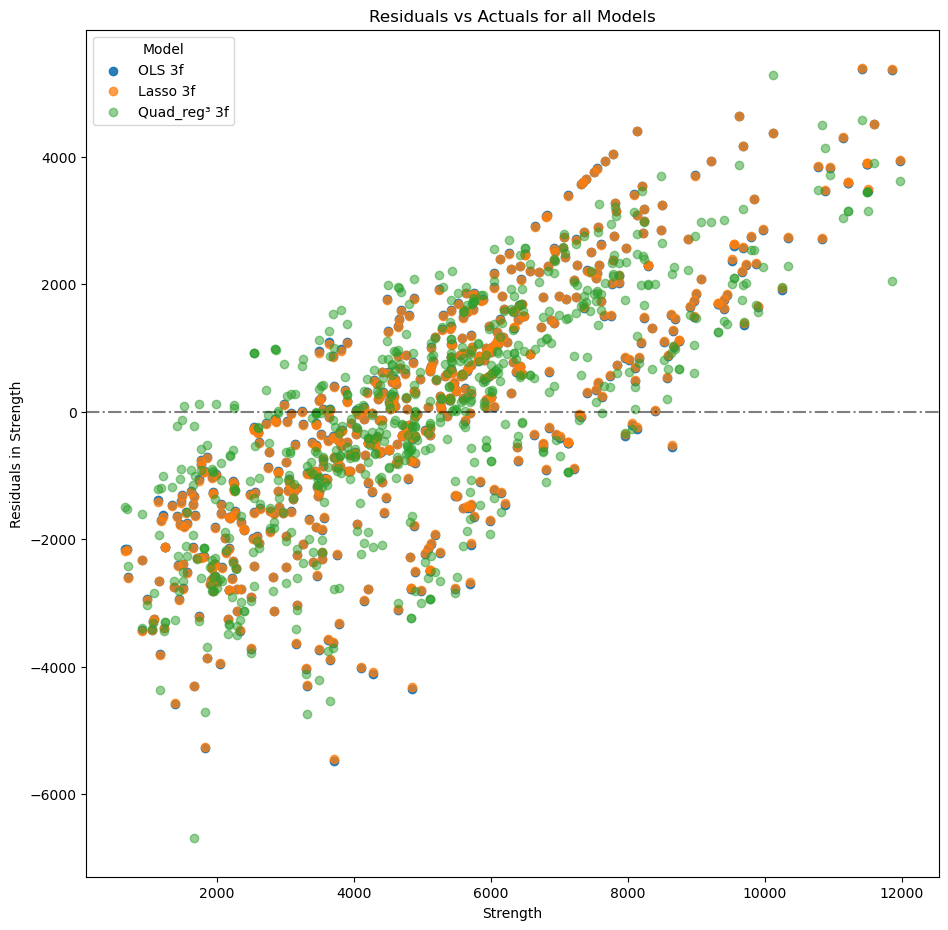

In [47]:
# Convert y to a numpy array for consistent operations
y_array = y.values.ravel()  # This flattens y to a 1D numpy array

# Now plotting
plt.figure(figsize=(11, 11))
plt.scatter(y, y - lr1.predict(X_train_rfe3), label='OLS 3f', alpha=0.95)
plt.scatter(y_train, y_array - lasso.predict(X_train_selected), label='Lasso 3f', alpha=0.75)
plt.scatter(y_train, y - plyreg3.predict(x_train_sq_selected), label='Quad_reg³ 3f', alpha=0.5)
plt.title('Residuals vs Actuals for all Models')
plt.axhline(0, ls='-.', c='k', alpha=0.5)
plt.ylabel('Residuals in Strength')
plt.xlabel('Strength')
plt.legend(title='Model')
plt.show()


### Test Model: Ploynomial Regression to the power of 3

In [48]:
# setting baseline for validation comparison
test_dict = pd.DataFrame([{
    'Test Model': 'baseline',
    'Test rmse': round(baseline_rmse,2),
    'Test r²': round(baseline_r2,4)
}])
# concating on val_dict to add another model on validate
test_rmse, test_r2 = e.evaluate_reg(y_test, plyreg3.predict(x_test_sq_selected))
test_dict = pd.concat([test_dict, pd.DataFrame([({
    'Test Model': 'quad_reg3.3',
    'Test rmse': test_rmse,
    'Test r²': test_r2
})])], ignore_index=True, axis=0)

test_dict

,Test Model,Test rmse,Test r²
0,baseline,2373.700000,0.000000
1,quad_reg3.3,1784.105793,0.479165


## Results for the Models using: Ploynomial Regression to the power of 3
### -**Baseline**:_ rmse= `2373.700000`, r²= *0.000000*
### -**Train**:____ rmse= `1778.313463`, r²= *0.438740*
### -**Validate**:_ rmse= `1826.639054`, r²= *0.465929*
### -**Test**:_____ rmse= `1784.105793`, r²= *0.479165*

# **Conclusion**

## Summary
#### The Polynomial Regression model significantly outperforms the baseline, explaining up to 47.92% of the variance in concrete strength.
#### With 'total_lbs_per_yd^3' positively correlated and 'coarseagg' and 'fineagg' negatively correlated with strength, all significant at an alpha below 0.05.

## Recommendations
#### Stakeholders should prioritize optimizing the total mix composition, particularly focusing on the 'total_lbs_per_yd^3' due to its strong positive impact on strength.
#### A deeper analysis of 'coarseagg' and 'fineagg' proportions is advised to enhance the concrete's strength further.

## Next Steps
#### Explore additional features or transformations that might better capture the relationships in the data, such as interaction terms between different types of aggregates.